In [1]:

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from matplotlib import animation
import cv2
from scipy.interpolate import LinearNDInterpolator
import h5py
from scipy.signal import convolve2d, medfilt2d
from scipy.interpolate import CloughTocher2DInterpolator
from scipy.ndimage import gaussian_filter, median_filter
from wave_prop_module import Wave2d
import torch
from torch.nn.functional import grid_sample
import scipy
from scipy.interpolate import RegularGridInterpolator

## Synthetic signal for validation of method implementation

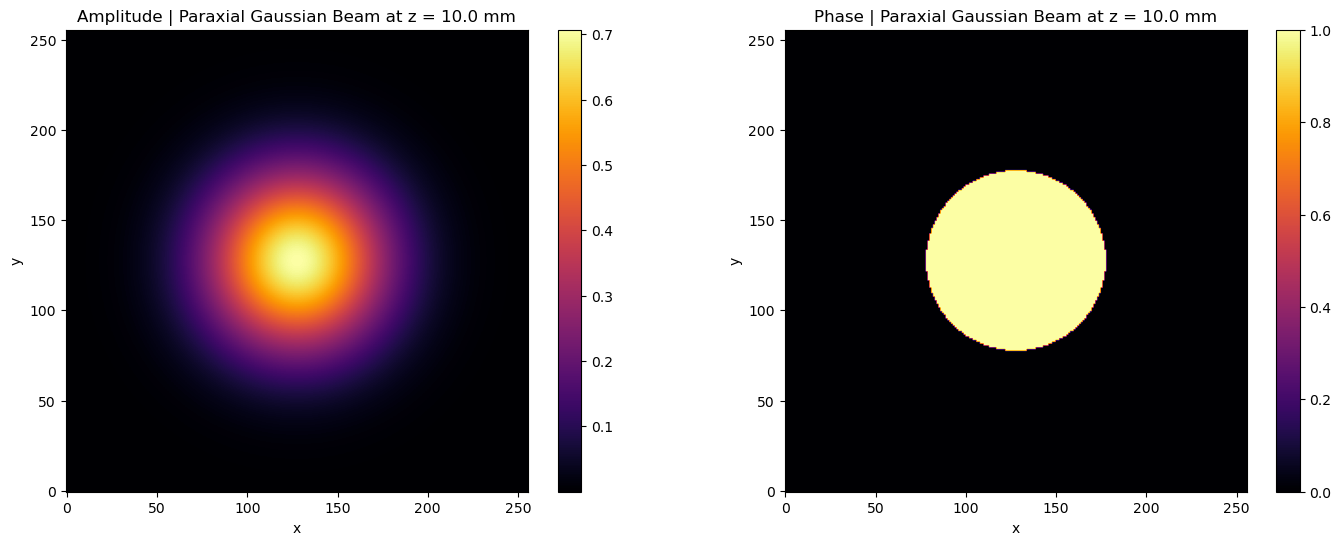

In [2]:
# generating a gaussian beam

def gaussian_beam(x, y, wavelength, waist_size, z, phase=0):
    k = 2 * np.pi / wavelength
    zR = np.pi * waist_size**2 / wavelength
    w_z = waist_size * np.sqrt(1 + (z / zR)**2)
    R_z = z * (1 + (zR / z)**2)
    gouy_phase = np.arctan(z / zR)
    
    w_0 = waist_size / np.sqrt(2)
    # phase_term = np.exp(1j * (k * z - k * x**2 / (2 * R_z) - gouy_phase + phase))
    thresh = x**2 + y**2 < waist_size
    phase_term = np.exp(1j * 1 * thresh)

    
    return (w_0 / w_z) * np.exp(-((x**2 + y**2) / w_z**2)) * phase_term

# Parameters
wl = 650*1e-6  # wavelength (in mm)
numPx = [256, 256]
sizePx = [0.02, 0.02]
waist_size = 1. # waist size of the beam (in mm)
z = 10  # propagation distance (in mm)


# Grid
x = np.linspace(-1*sizePx[0]*numPx[0]/2, sizePx[0]*numPx[0]/2, numPx[0])
y = np.linspace(-1*sizePx[1]*numPx[1]/2, sizePx[1]*numPx[1]/2, numPx[1])
X, Y = np.meshgrid(x, y)

# Generate Gaussian beam
gaussian_field = gaussian_beam(X, Y, wl, waist_size, z)


# Plot
fig, axs = plt.subplots(1, 2, figsize=(17, 6))

cb = axs[0].imshow((np.abs(gaussian_field)), 
        #    extent=(-5, 5, -5, 5), 
           cmap='inferno', origin='lower')
fig.colorbar(cb, ax=axs[0])
axs[0].set_title('Amplitude | Paraxial Gaussian Beam at z = {:.1f} mm'.format(z))
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

cb = axs[1].imshow((np.angle(gaussian_field)), 
        #    extent=(-5, 5, -5, 5), 
           cmap='inferno', origin='lower')
fig.colorbar(cb, ax=axs[1])
axs[1].set_title('Phase | Paraxial Gaussian Beam at z = {:.1f} mm'.format(z))
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

plt.show()

In [3]:
# angle = 60

# x_rot, y_rot = 0, angle
# rot_plane = [(x_rot/180)*np.pi, (y_rot/180)*np.pi]
# freqX, freqY, J = gauss_obj.obliquePlaneFreqs(rot_plane)
# Z = gauss_obj.fft_wave_z1*np.abs(J)
# plt.imshow(np.log10(np.abs(Z) + 1e-8))
# plt.colorbar()
# plt.show()

In [20]:
# plt.imshow(U)
# plt.colorbar()
# plt.show()
# plt.plot(U[0, :])

# U[0, 0], U[0, -1], U[-1, 0], U[-1, -1]

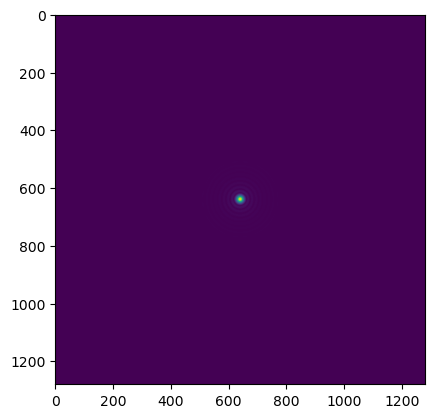

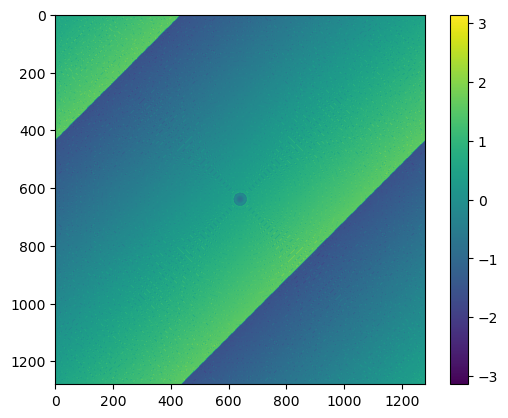

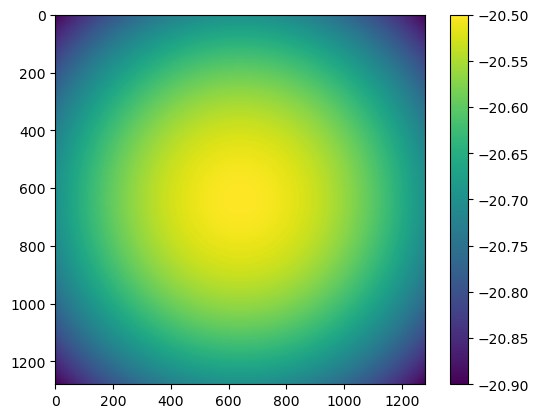

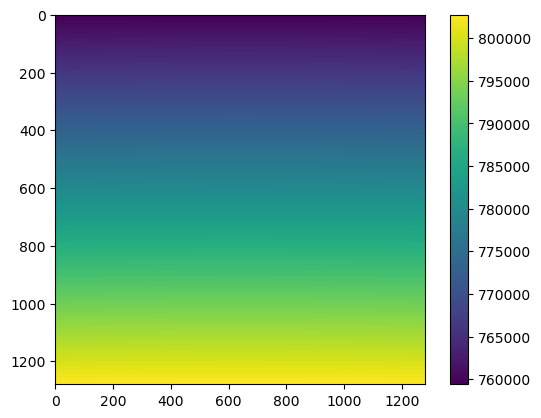

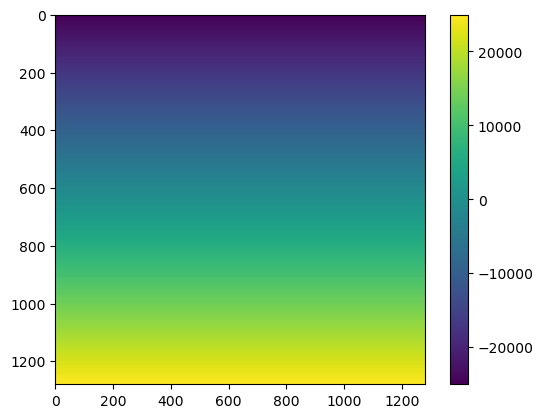

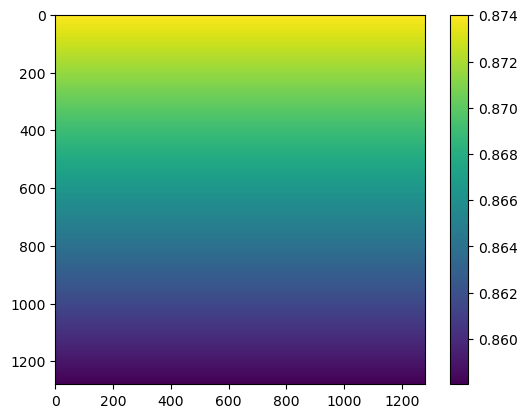

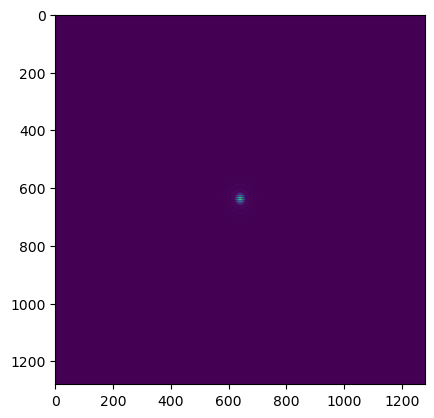

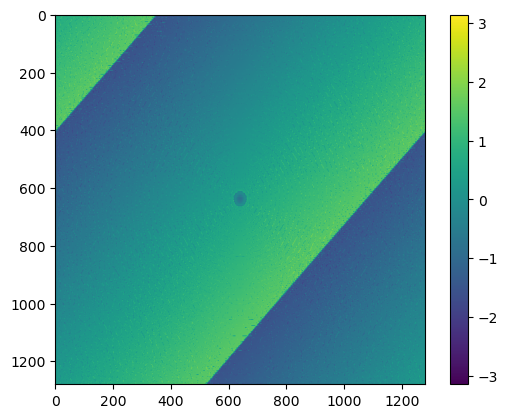

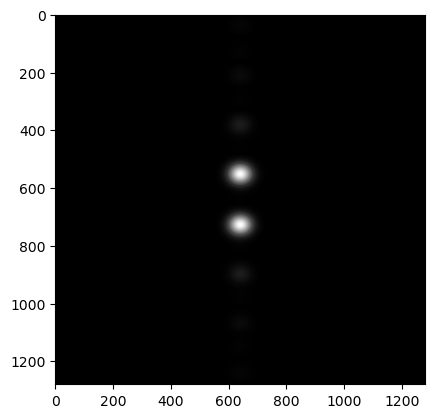

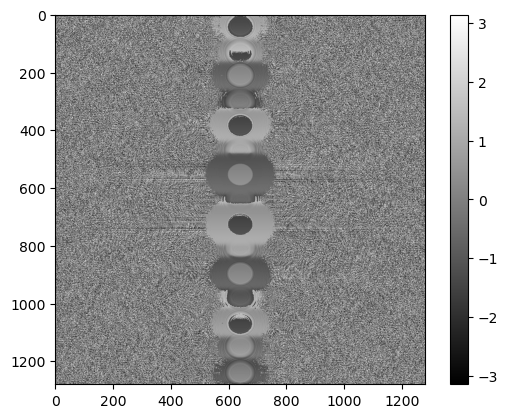

In [ ]:
phi = np.pi/6

u_hat = v_hat = np.fft.fftshift(np.fft.fftfreq(256, 20e-6))
U_hat, V_hat = np.meshgrid(u_hat, v_hat, indexing='ij')

wave_z_freq = np.fft.fftshift(np.fft.fft2(np.pad(gaussian_field, 512)))

plt.imshow(np.abs(wave_z_freq))
plt.show()
plt.imshow(np.angle(wave_z_freq))
plt.colorbar()
plt.show()

W_hat = np.sqrt(1/((640e-9)**2) - U_hat**2 - V_hat**2)

plt.imshow(W_hat/1e3 - 1.583e3)
plt.colorbar()
plt.show()

# U_hat = (U - W_hat*np.sin(phi))/np.cos(phi)
# U_hat -= np.median(U_hat[:, 0])

U = U_hat*np.cos(phi) + W_hat*np.sin(phi)
V = V_hat

plt.imshow(U)
plt.colorbar()
plt.show()

plt.imshow(U_hat)
plt.colorbar()
plt.show()

J = np.abs(np.cos(phi) - U_hat/W_hat*np.sin(phi))

plt.imshow(J)
plt.colorbar()
plt.show()

interp = RegularGridInterpolator((u_hat, v_hat), wave_z_freq, method='linear', bounds_error=False, fill_value=None)

wave_z_freq_interp = interp((U  - np.median(U), V))
# wave_z_freq_interp = interp((U, V))


plt.imshow(np.abs(wave_z_freq_interp))
plt.show()
plt.imshow(np.angle(wave_z_freq_interp))
plt.colorbar()
plt.show()

# wave_z_freq_interp_roll = np.roll(wave_z_freq_interp, (128 - np.abs(wave_z_freq_interp).argmax() // 256), axis=0)

# plt.imshow(np.abs(wave_z_freq_interp_roll))
# plt.show()
# plt.imshow(np.angle(wave_z_freq_interp_roll))
# plt.colorbar()
# plt.show()

new_f = np.fft.fft2(wave_z_freq_interp)

plt.imshow((np.abs(new_f)), cmap='gray')
plt.show()

plt.imshow(np.angle(new_f), cmap='gray')
plt.colorbar()
plt.show()

In [5]:
plt.imshow(U, cmap='jet')
plt.colorbar()

NameError: name 'U' is not defined

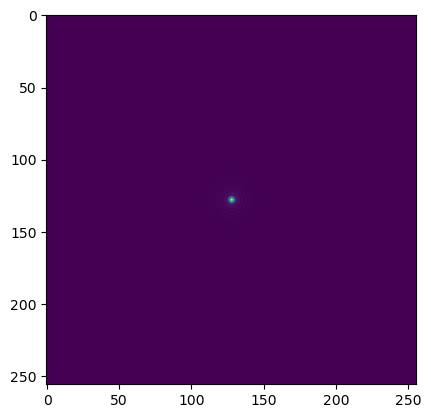

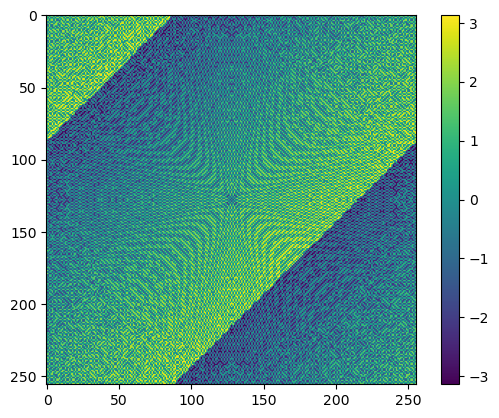

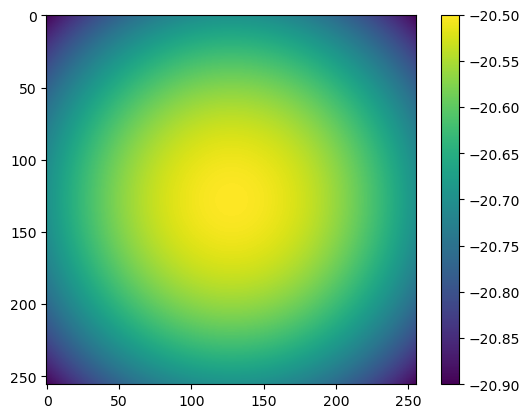

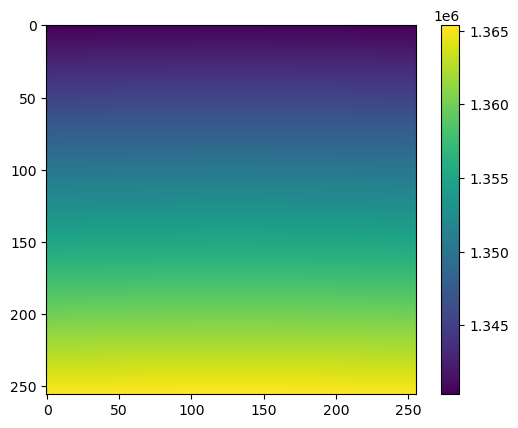

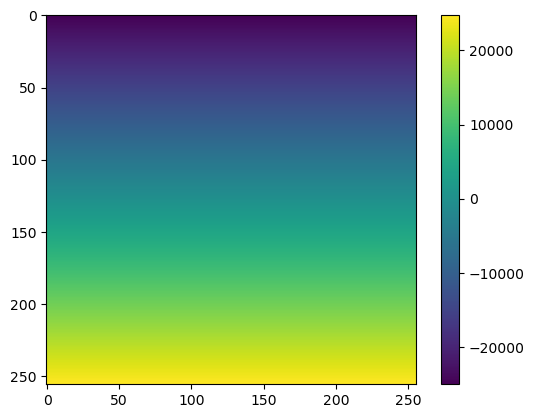

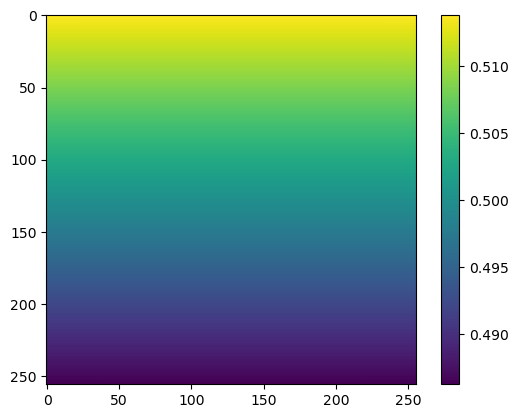

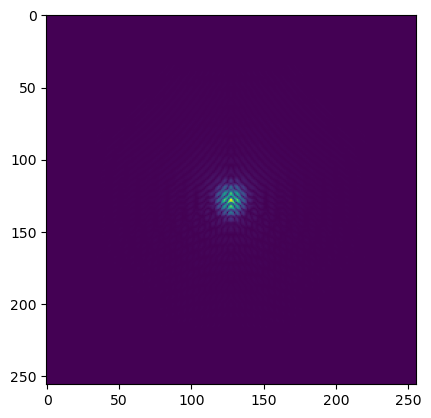

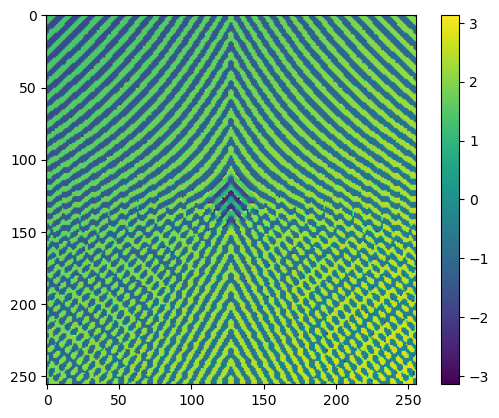

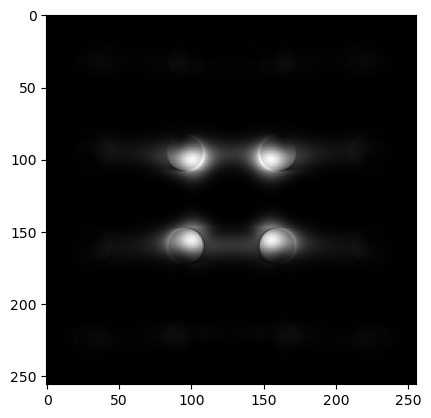

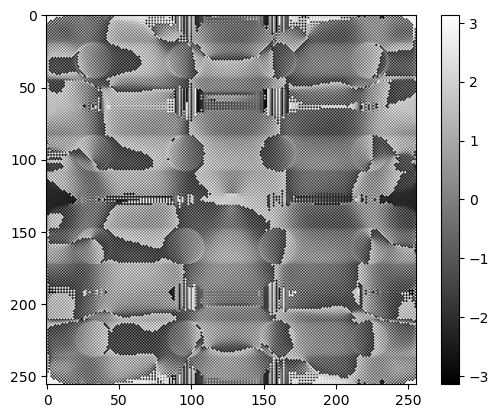

In [6]:
phi = np.pi/3

u_hat = v_hat = np.fft.fftshift(np.fft.fftfreq(256, 20e-6))
U_hat, V_hat = np.meshgrid(u_hat, v_hat, indexing='ij')

wave_z_freq = np.fft.fftshift(np.fft.fft2(np.pad(gaussian_field, 0)))

plt.imshow(np.abs(wave_z_freq))
plt.show()
plt.imshow(np.angle(wave_z_freq))
plt.colorbar()
plt.show()

W_hat = np.sqrt(1/((640e-9)**2) - U_hat**2 - V_hat**2)

plt.imshow(W_hat/1e3 - 1.583e3)
plt.colorbar()
plt.show()

# U_hat = (U - W_hat*np.sin(phi))/np.cos(phi)
# U_hat -= np.median(U_hat[:, 0])

U = U_hat*np.cos(phi) + W_hat*np.sin(phi)
V = V_hat

plt.imshow(U)
plt.colorbar()
plt.show()

plt.imshow(U_hat)
plt.colorbar()
plt.show()

J = np.abs(np.cos(phi) - U_hat/W_hat*np.sin(phi))

plt.imshow(J)
plt.colorbar()
plt.show()

# interp = LinearNDInterpolator(list(zip(U.ravel(), V.ravel())), wave_z_freq.ravel())

# u2 = U.ravel() - np.median(U.ravel())
interp = CloughTocher2DInterpolator(list(zip(U.ravel() - np.median(U.ravel()), V.ravel())), wave_z_freq.ravel())

X = np.linspace(min(U.ravel()), max(U.ravel()), 256*4)
Y = np.linspace(min(V.ravel()), max(V.ravel()), 256*4)
X, Y = np.meshgrid(X - np.median(U.ravel()), Y, indexing='ij') 

wave_z_freq_interp = np.where(np.isnan(interp(X, Y)) == True, 0., interp(X, Y))

cx = np.where(np.abs(wave_z_freq_interp).max() == np.abs(wave_z_freq_interp))[0][0]
cy = np.where(np.abs(wave_z_freq_interp).max() == np.abs(wave_z_freq_interp))[1][0]

wave_z_freq_interp = wave_z_freq_interp[cx-128:cx+128, cy-128:cy+128]
plt.imshow(np.abs(wave_z_freq_interp))
plt.show()
plt.imshow(np.angle(wave_z_freq_interp))
plt.colorbar()
plt.show()

# wave_z_freq_interp_roll = np.roll(wave_z_freq_interp, (128 - np.abs(wave_z_freq_interp).argmax() // 256), axis=0)

# plt.imshow(np.abs(wave_z_freq_interp_roll))
# plt.show()
# plt.imshow(np.angle(wave_z_freq_interp_roll))
# # plt.colorbar()[:256, :256][:256, :256]
# plt.show()



new_f = np.fft.fftshift(np.fft.ifft2(wave_z_freq_interp))

plt.imshow((np.abs(new_f)[:256, :256]), cmap='gray')
plt.show()

plt.imshow(np.angle(new_f)[:256, :256], cmap='gray')
plt.colorbar()
plt.show()

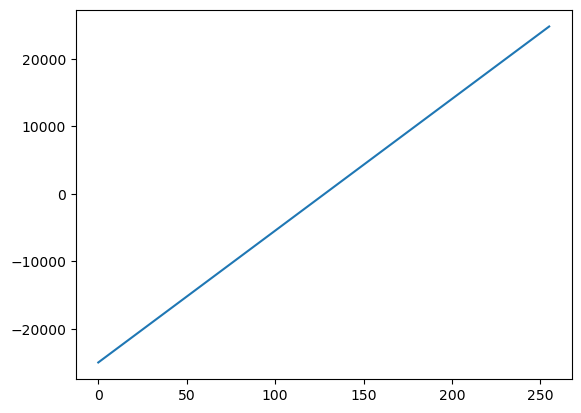

In [7]:
plt.plot(np.fft.fftshift(np.fft.fftfreq(256, 20e-6)))

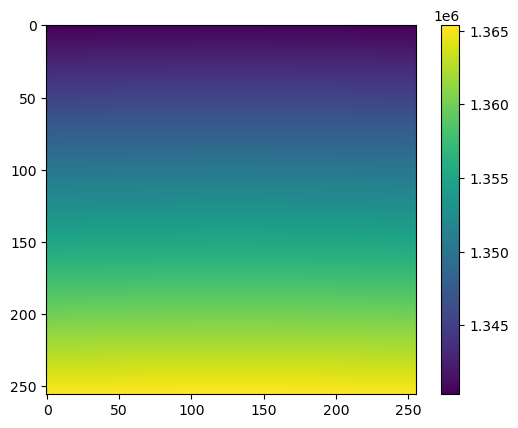

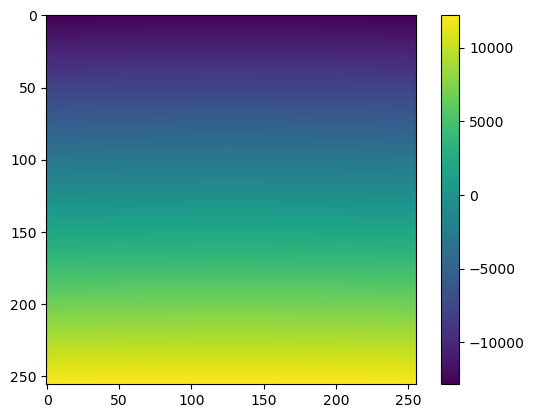

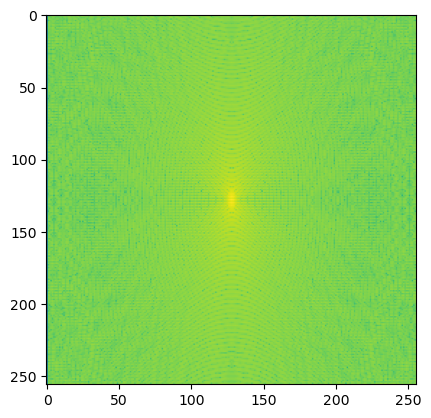

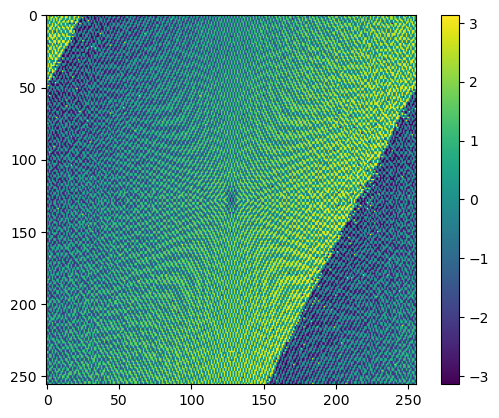

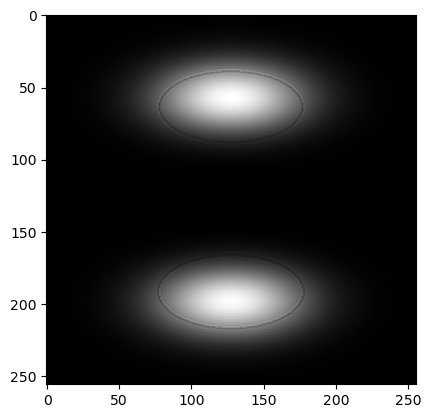

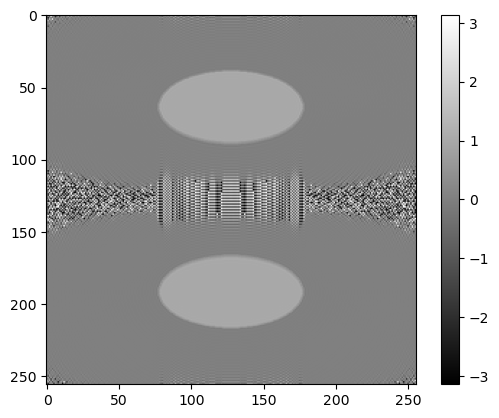

In [210]:
# Generate Gaussian beam
gaussian_field = gaussian_beam(X, Y, wl, waist_size, z)

phi = np.pi/3

u = v = np.fft.fftshift(np.fft.fftfreq(256, 20e-6))
wave_z_freq = np.fft.fftshift(np.fft.fft2(np.pad(gaussian_field, 0)))
interp = RegularGridInterpolator((u, v), wave_z_freq, method='linear', bounds_error=False, fill_value=0)

u_hat = np.fft.fftshift(np.fft.fftfreq(256, 20e-6))
v_hat = np.fft.fftshift(np.fft.fftfreq(256, 20e-6))
U_hat, V_hat = np.meshgrid(u_hat, v_hat, indexing='ij')
W_hat = np.sqrt(1/((640e-9)**2) - U_hat**2 - V_hat**2)
J = np.abs(np.cos(phi) - U_hat/W_hat*np.sin(phi))
U1 = U_hat*np.cos(phi) + W_hat*np.sin(phi)
V1 = V_hat

plt.imshow(U1)
plt.colorbar()
plt.show()

U_mod = U1 - 1*np.sin(phi)/640e-9 #- np.median(U1.ravel())

plt.imshow(U_mod)
plt.colorbar()
plt.show()

wave_z_freq_interp = interp((U_mod, V1))
plt.imshow(np.log10(np.abs(wave_z_freq_interp)))
plt.show()
plt.imshow(np.angle(wave_z_freq_interp))
plt.colorbar()
plt.show()


new_f = np.fft.ifft2(np.fft.ifftshift(wave_z_freq_interp*J))

plt.imshow((np.abs(new_f)), cmap='gray')
plt.show()
# [:256, :256]
plt.imshow(np.angle(new_f), cmap='gray')
plt.colorbar()
plt.show()

# interp_2 = RegularGridInterpolator((u_hat - 1*np.sin(phi)/640e-9, v_hat), wave_z_freq_interp*J, method='linear', bounds_error=False, fill_value=0)

# u_hat = np.fft.fftshift(np.fft.fftfreq(2560, 1e-6))
# v_hat = np.fft.fftshift(np.fft.fftfreq(2560, 1e-6))
# U_hat, V_hat = np.meshgrid(u_hat, v_hat, indexing='ij')

# wave_z_freq_interp_2 = interp_2((U_hat, V_hat))
# new_f_2 = np.fft.fftshift(np.fft.fft2(wave_z_freq_interp_2))

# plt.imshow((np.abs(new_f_2)), cmap='gray')
# plt.show()
# # [:256, :256]
# plt.imshow(np.angle(new_f_2), cmap='gray')
# plt.colorbar()
# plt.show()

/tmp/ipykernel_12973/2421518073.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.fft.fftshift(np.abs(np.fft.fft2(gaussian_field))))[50:-50, 50:-50])


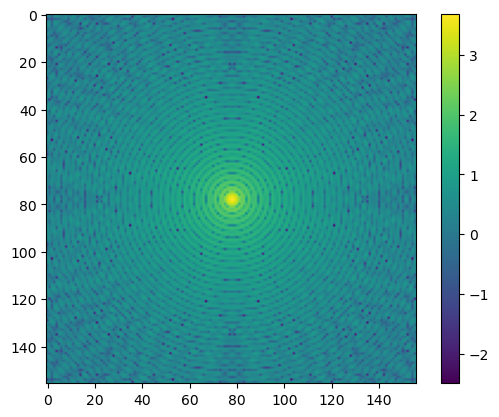

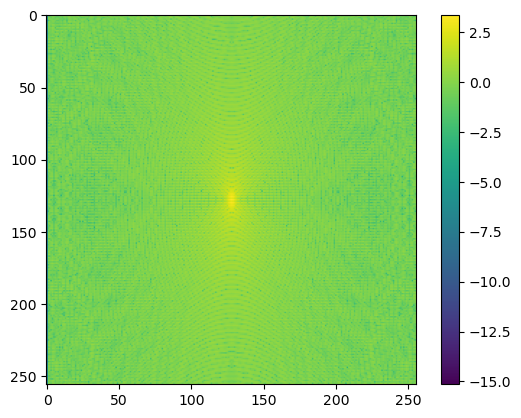

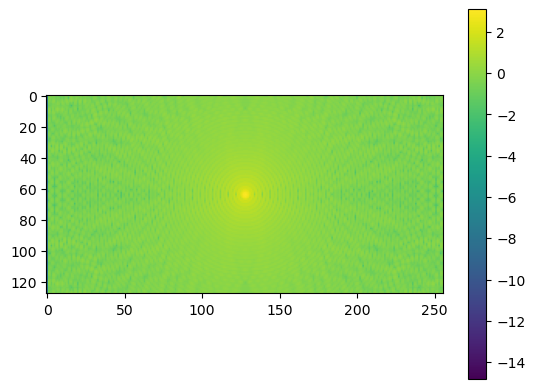

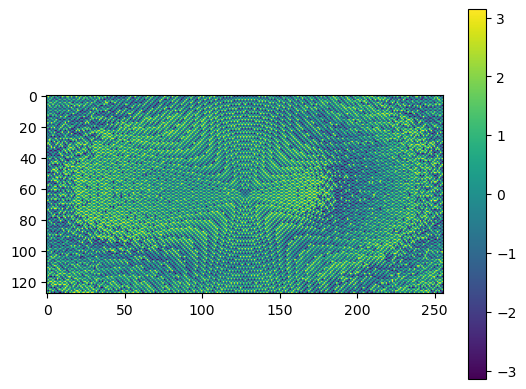

In [211]:
plt.imshow(np.log10(np.fft.fftshift(np.abs(np.fft.fft2(gaussian_field))))[50:-50, 50:-50])
plt.colorbar()
plt.show()

plt.imshow(np.log10(np.fft.fftshift(np.abs(np.fft.fft2(new_f[:])))))
plt.colorbar()
plt.show()

plt.imshow(np.log10(np.fft.fftshift(np.abs(np.fft.fft2(new_f[:128])))))
plt.colorbar()
plt.show()

plt.imshow((np.fft.fftshift(np.angle(np.fft.fft2(new_f[:128])))))
plt.colorbar()
plt.show()

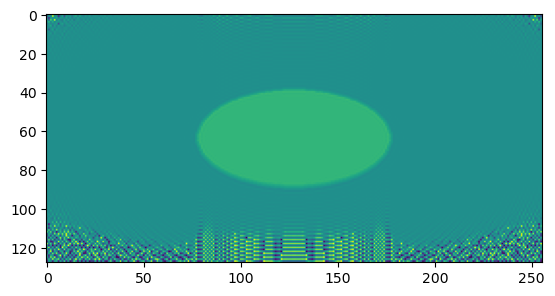

In [212]:
plt.imshow(np.angle(np.fft.ifft2((np.fft.fft2(new_f[:128])))))

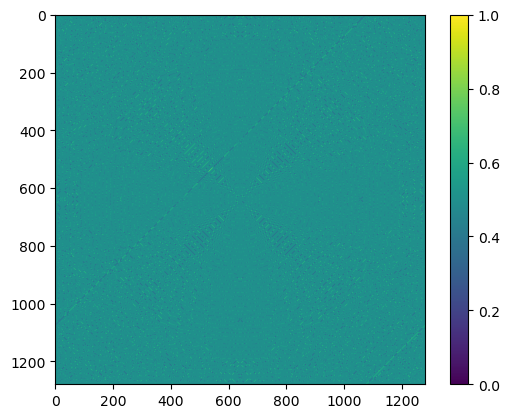

In [147]:
plt.imshow(np.abs(np.where(wave_z_freq/np.abs(wave_z_freq) > 1e-8, wave_z_freq/np.abs(wave_z_freq), 0.)))
plt.colorbar()

In [13]:
256*3, wave_z_freq_interp.shape

(768, (768, 768))

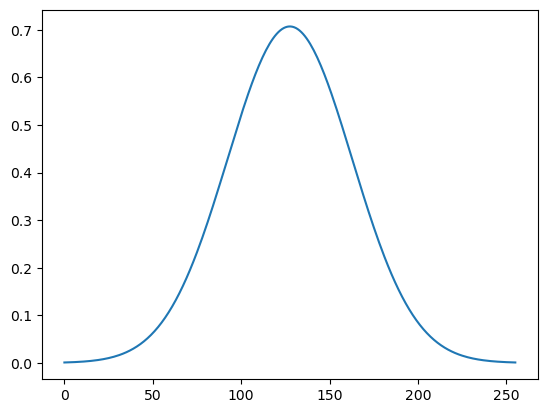

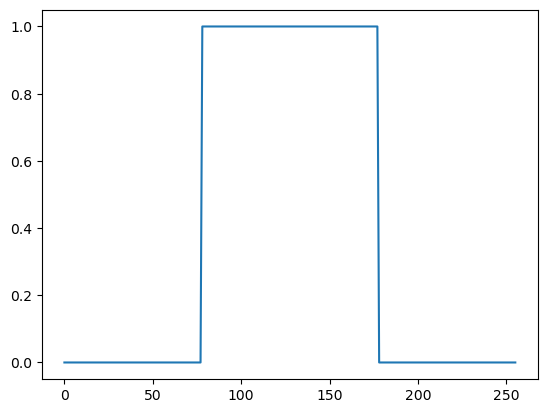

/tmp/ipykernel_78227/2644372644.py:19: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(np.abs(wave_z_freq))[pad + 128 -50:pad + 128 +50, pad+128])


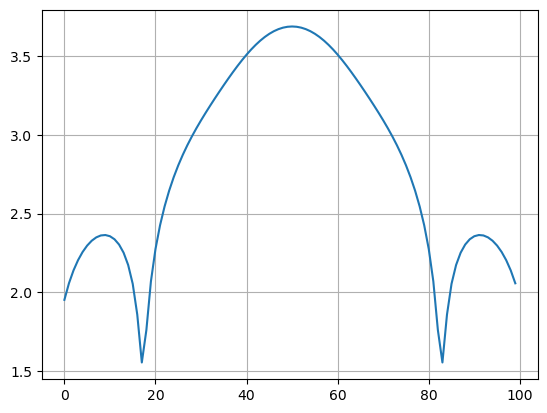

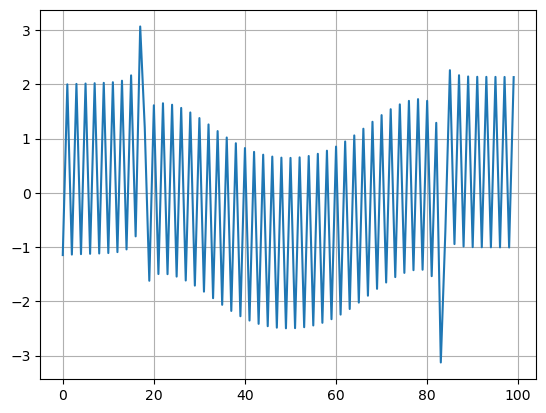

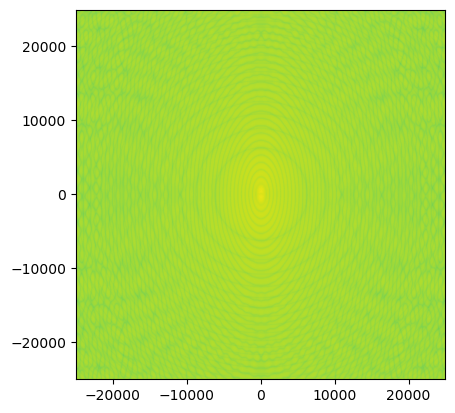

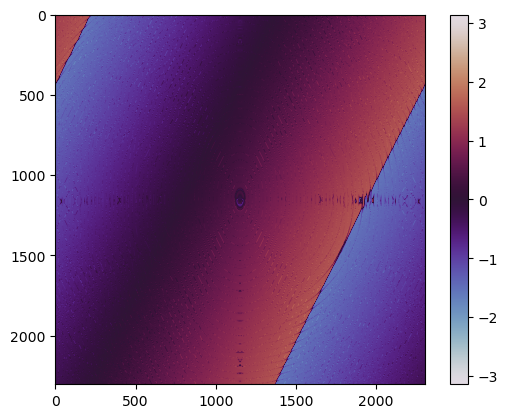

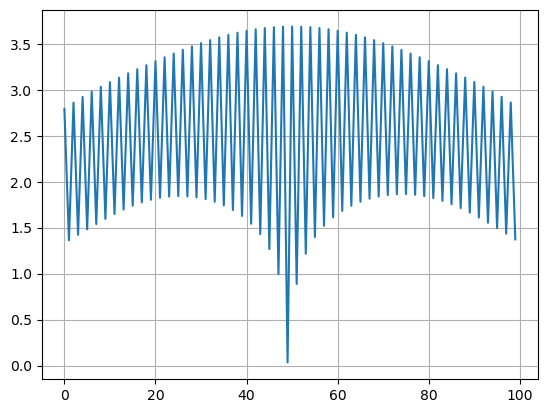

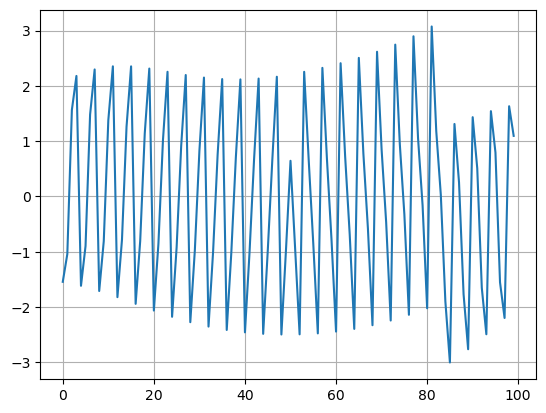

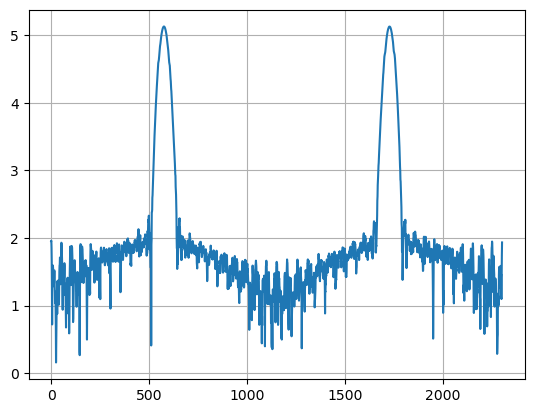

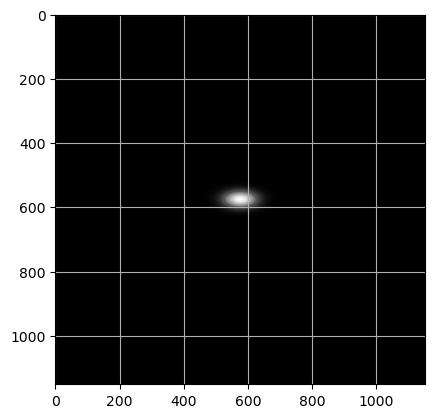

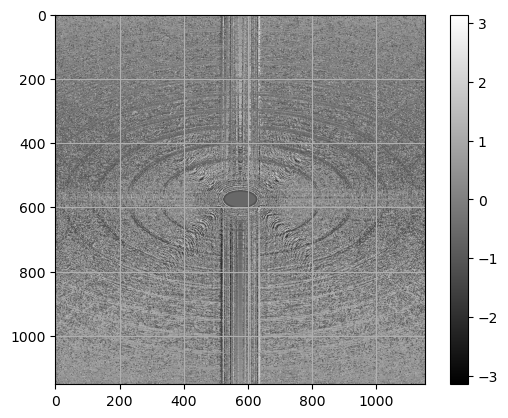

In [69]:
# Generate Gaussian beam
# Grid
x = np.linspace(-1*sizePx[0]*numPx[0]/2, sizePx[0]*numPx[0]/2, numPx[0])
y = np.linspace(-1*sizePx[1]*numPx[1]/2, sizePx[1]*numPx[1]/2, numPx[1])
X, Y = np.meshgrid(x, y)
gaussian_field = gaussian_beam(X, Y, wl, waist_size, z)

plt.plot(np.abs(gaussian_field[:, 128]))
plt.show()
plt.plot(np.angle(gaussian_field[:, 128]))
plt.show()

phi = np.pi/3
pad = 1024

u = v = np.fft.fftshift(np.fft.fftfreq(256+int(pad*2), 20e-6))
wave_z_freq = np.fft.fftshift(np.fft.fft2(np.pad(gaussian_field, pad)))

plt.plot(np.log10(np.abs(wave_z_freq))[pad + 128 -50:pad + 128 +50, pad+128])
plt.grid()
plt.show()

plt.plot((np.angle(wave_z_freq))[pad + 128 -50:pad + 128 +50, pad+128])
plt.grid()
plt.show()

interp1 = RegularGridInterpolator((u, v), gaussian_filter(np.abs(wave_z_freq), 0.05), method='linear', bounds_error=False, fill_value=0)

interp2_re = RegularGridInterpolator((u, v), gaussian_filter((wave_z_freq/np.abs(wave_z_freq + 1e-8)).real, 0.05), method='linear', bounds_error=False, fill_value=0)
interp2_im = RegularGridInterpolator((u, v), gaussian_filter((wave_z_freq/np.abs(wave_z_freq + 1e-8)).imag, 0.05), method='linear', bounds_error=False, fill_value=0)

# interp2_re = RegularGridInterpolator((u, v), (np.where(np.abs(wave_z_freq) > 1e-8, wave_z_freq/np.abs(wave_z_freq), 0.)).real, method='linear', bounds_error=False, fill_value=0)
# interp2_im = RegularGridInterpolator((u, v), (np.where(np.abs(wave_z_freq) > 1e-8, wave_z_freq/np.abs(wave_z_freq), 0.)).imag, method='linear', bounds_error=False, fill_value=0)

u_hat = np.fft.fftshift(np.fft.fftfreq(256+int(pad*2), 20e-6))
v_hat = np.fft.fftshift(np.fft.fftfreq(256+int(pad*2), 20e-6))
U_hat, V_hat = np.meshgrid(u_hat, v_hat, indexing='ij')
W_hat = np.sqrt(1/((640e-9)**2) - U_hat**2 - V_hat**2)
J = np.abs(np.cos(phi) - U_hat/W_hat*np.sin(phi))
U1 = U_hat*np.cos(phi) + W_hat*np.sin(phi)
V1 = V_hat

# plt.imshow(U1)
# plt.colorbar()
# plt.show()

U_mod = U1 - 1*np.sin(phi)/640e-9 #- np.median(U1.ravel())
W_mod = np.sqrt(1/((640e-9)**2) - U_mod**2 - V1**2)
J_mod = np.abs(np.cos(phi) - U_mod/W_mod*np.sin(phi))


# plt.imshow(U_mod)
# plt.colorbar()
# plt.show()

wave_z_freq_interp1 = interp1((U_mod, V1))
wave_z_freq_interp2 = interp2_re((U_mod, V1))
wave_z_freq_interp3 = interp2_im((U_mod, V1))

wave_z_freq_interp = wave_z_freq_interp1*(wave_z_freq_interp2 + 1j*wave_z_freq_interp3)
# wave_z_freq_interp = wave_z_freq_interp1*np.exp(1j*np.arctan(wave_z_freq_interp3/np.where(np.abs(wave_z_freq_interp2) > 1e-4, wave_z_freq_interp2, 1e-4)))

plt.imshow(np.log10(np.abs(wave_z_freq_interp))[:, :], extent=[U_hat.min(), U_hat.max(), V1.min(), V1.max()])
plt.show()
plt.imshow(np.angle(wave_z_freq_interp)[:, :], cmap='twilight')
plt.colorbar()
plt.show()

plt.plot(np.log10(np.abs(wave_z_freq_interp))[pad + 128 -50:pad + 128 +50, pad+128])
plt.grid()
plt.show()

plt.plot((np.angle(wave_z_freq_interp))[pad + 128 -50:pad + 128 +50, pad+128])
plt.grid()
plt.show()

plt.plot(np.log10(np.abs(np.fft.fft((wave_z_freq_interp[:, pad+128])))))
plt.grid()
plt.show()
# x, y = np.linspace(-1, 1, wave_z_freq_interp.shape[0])*20e-6, np.linspace(-1, 1, wave_z_freq_interp.shape[1])*20e-6
# X, Y = np.meshgrid(x, y)
# shift = np.exp(-1j*2*np.pi*(np.sin(phi)/640e-9)*X)
new_f = np.roll(np.fft.fft2(wave_z_freq_interp[::2, ::2]*J_mod[::2, ::2]), int(pad/2 + 256/4), axis=1)
# new_f = np.fft.fft2(wave_z_freq_interp[:, :]*J_mod[:, :])

# new_f = np.roll(np.fft.ifft2((wave_z_freq_interp*J_mod)), int(256/4), axis=0)[int(pad/2):int(pad/2)+256, pad:pad+256]
# 

plt.imshow((np.abs(new_f)), cmap='gray')
plt.grid()
plt.show()
# [:256, :256]
plt.imshow(np.angle(new_f), cmap='gray')
plt.colorbar()
plt.grid()
plt.show()

In [133]:
pad

512

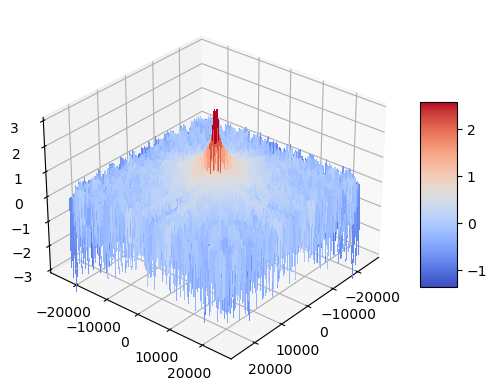

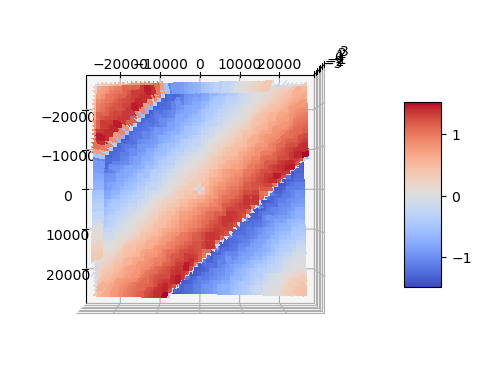

In [ ]:
# Generate Gaussian beam
gaussian_field = gaussian_filter(gaussian_beam(X, Y, wl, waist_size, z), 1e-3)

phi = np.pi/12

apod_win = scipy.signal.windows.tukey(256, 0.999, sym=False)

pad = 512
u = v = np.fft.fftshift(np.fft.fftfreq(256 + pad*2, 20e-6))
U, V = np.meshgrid(u, v, indexing='ij')

gaussian_field = gaussian_field*np.outer(apod_win, apod_win)
wave_z_freq = np.fft.fftshift(np.fft.fft2(np.pad(gaussian_field, pad)))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(U, V, np.log10(np.abs(wave_z_freq)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# # Customize the z axis.
ax.set_zlim(-3, 3)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.xaxis.set_major_locator(LinearLocator(5))
# ax.yaxis.set_major_locator(LinearLocator(5))
# A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# ax.scatter(0, 0, zs=3, zdir='z', color='green')

ax.view_init(elev=30, azim=40, roll=0)
plt.show()

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(U, V, np.angle(wave_z_freq), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# # Customize the z axis.
# ax.set_zlim(-3, 3)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# ax.scatter(0, 0, zs=3, zdir='z', color='green')

ax.view_init(elev=90, azim=0, roll=0)
plt.show()

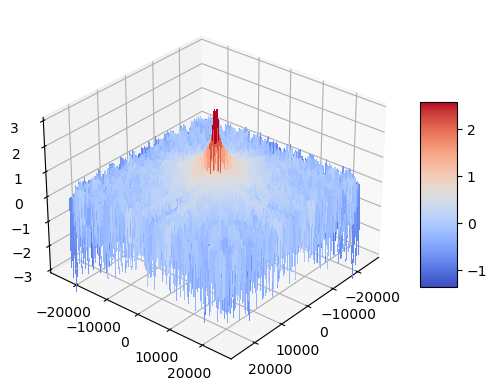

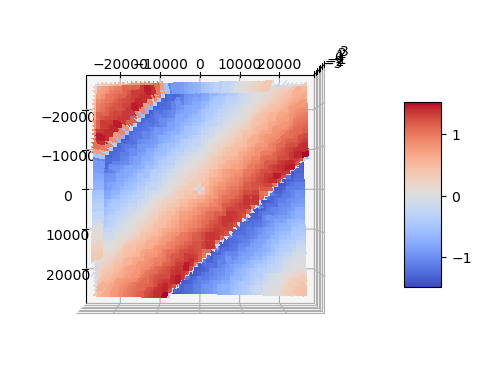

In [ ]:

# mask = gaussian_filter(np.where(U**2 + V**2 < 1e7, 1., 0.), 5)

# interp_abs = RegularGridInterpolator((u, v), np.real(wave_z_freq), method='linear', bounds_error=False, fill_value=0)
interp = RegularGridInterpolator((u, v), wave_z_freq, method='linear', bounds_error=False, fill_value=0)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(U, V, np.log10(np.abs(interp((U, V)))), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# # Customize the z axis.
ax.set_zlim(-3, 3)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# ax.scatter(0, 0, zs=3, zdir='z', color='green')

ax.view_init(elev=30, azim=40, roll=0)
plt.show()

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(U, V, np.angle(interp((U, V))), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# # Customize the z axis.
# ax.set_zlim(-3, 3)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# ax.scatter(0, 0, zs=3, zdir='z', color='green')

ax.view_init(elev=90, azim=0, roll=0)
plt.show()

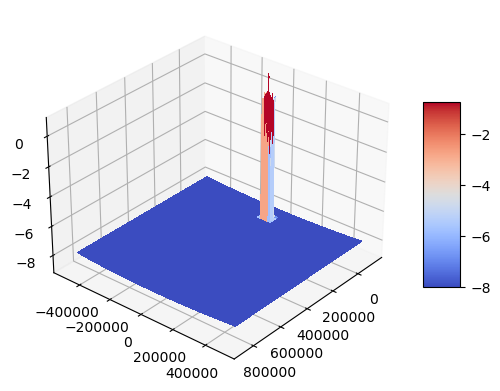

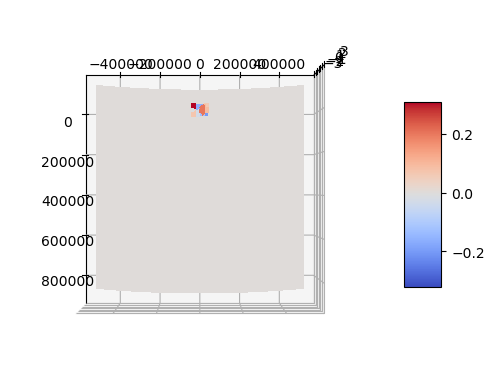

In [ ]:

u_hat = v_hat = np.fft.fftshift(np.fft.fftfreq(1024*4, 1.e-6))

U_hat, V_hat = np.meshgrid(u_hat, v_hat, indexing='ij')
W_hat = np.sqrt(1/((640e-9)**2) - U_hat**2 - V_hat**2)
J = np.abs(np.cos(phi) - U_hat/W_hat*np.sin(phi))

U1 = U_hat*np.cos(phi) + W_hat*np.sin(phi)
V1 = V_hat

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(U1, V1, np.log10(np.abs(interp((U1, V1)))+1e-8), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# # Customize the z axis.
ax.set_zlim(-9, 1)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# ax.scatter(0, 0, zs=3, zdir='z', color='green')

ax.view_init(elev=30, azim=40, roll=0)
plt.show()

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(U1, V1, np.angle(interp((U1, V1))), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# # Customize the z axis.
# ax.set_zlim(-3, 3)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# ax.scatter(0, 0, zs=3, zdir='z', color='green')

ax.view_init(elev=90, azim=0, roll=0)
plt.show()

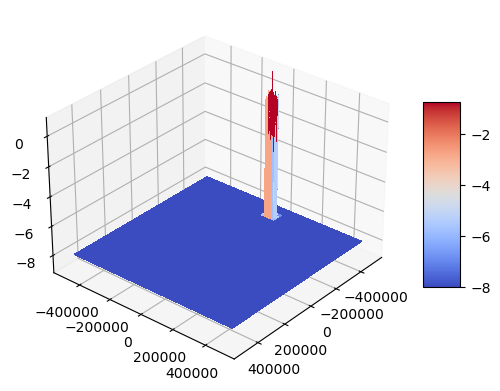

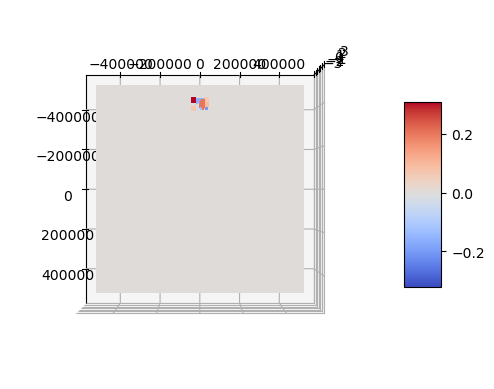

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(U_hat, V_hat, np.log10(np.abs(interp((U1, V1)))+1e-8), cmap=cm.coolwarm,
                   linewidth=0, antialiased=False)
# # Customize the z axis.
ax.set_zlim(-9, 1)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# ax.scatter(0, 0, zs=3, zdir='z', color='green')

ax.view_init(elev=30, azim=40, roll=0)
plt.show()

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(U_hat, V_hat, np.angle(interp((U1, V1))), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# # Customize the z axis.
# ax.set_zlim(-3, 3)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# ax.scatter(0, 0, zs=3, zdir='z', color='green')

ax.view_init(elev=90, azim=0, roll=0)
plt.show()

In [9]:
plt.imshow(np.log10(np.abs(interp((U1, V1))) + 1e-9) > -5)
plt.colorbar()
plt.show()

plt.plot(U_hat[:, 2000], (np.log10(np.abs(interp((U1, V1))) + 1e-9) > -5)[:, 2000])

NameError: name 'U1' is not defined

In [10]:
1./640e-3, 1/(0.5*1.5e6)/1e-6

(1.5625, 1.3333333333333335)

In [11]:
temp_signal = np.abs(interp((U1, V1)))

cx = np.where(temp_signal.max() == temp_signal)[0][0]
cy = np.where(temp_signal.max() == temp_signal)[1][0]

print(cx, cy, U_hat[cx, cy], V_hat[cx, cy])

u_hat_new = np.linspace(U_hat[cx, cy] - 0.5e5, U_hat[cx, cy] + 0.5e5, 2048)
v_hat_new = np.linspace(-0.5e5, 0.5e5, 2048)

U_hat_new, V_hat_new = np.meshgrid(u_hat_new, v_hat_new, indexing='ij')
W_hat_new = np.sqrt(1/((640e-9)**2) - U_hat_new**2 - V_hat_new**2)
J_new = np.abs(np.cos(phi) - U_hat_new/W_hat_new*np.sin(phi))

U1_new = U_hat_new*np.cos(phi) + W_hat_new*np.sin(phi)
V1_new = V_hat_new

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(U_hat_new, V_hat_new, np.log10(np.abs(interp((U1_new, V1_new)))+1e-8), cmap=cm.coolwarm,
                   linewidth=0, antialiased=False)
# # Customize the z axis.
ax.set_zlim(-9, 1)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# ax.scatter(0, 0, zs=3, zdir='z', color='green')

ax.view_init(elev=30, azim=40, roll=0)
plt.show()

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(U_hat_new, V_hat_new, np.angle(interp((U1_new, V1_new))), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# # Customize the z axis.
# ax.set_zlim(-3, 3)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# ax.scatter(0, 0, zs=3, zdir='z', color='green')

ax.view_init(elev=90, azim=0, roll=0)
plt.show()

NameError: name 'U1' is not defined

In [12]:
temp_signal_2 = interp((U1_new, V1_new))[800:-800, 800:-800]

apod_win = scipy.signal.windows.tukey(448, 0.1, sym=False)
temp_signal_2 = temp_signal_2*np.outer(apod_win, apod_win)

# temp_signal_2 = gaussian_filter(temp_signal_2, 1)

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# surf = ax.plot_surface(U_hat_new[400:-400, 400:-400] - U_hat[cx, cy], V_hat_new[400:-400, 400:-400], np.log10(np.abs(temp_signal_2) + 1e-4), cmap=cm.coolwarm,
#                    linewidth=0, antialiased=False)
# # # Customize the z axis.
# ax.set_zlim(-4, 1)

# # Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

# # ax.scatter(0, 0, zs=3, zdir='z', color='green')

# ax.view_init(elev=90, azim=120, roll=0)
# plt.show()

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# surf = ax.plot_surface(U_hat_new[400:-400, 400:-400] - U_hat[cx, cy], V_hat_new[400:-400, 400:-400], np.angle(temp_signal_2), cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)
# # # Customize the z axis.
# # ax.set_zlim(-3, 3)

# # Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

# # ax.scatter(0, 0, zs=3, zdir='z', color='green')

# ax.view_init(elev=90, azim=0, roll=0)
# plt.show()

NameError: name 'U1_new' is not defined

In [13]:
plt.imshow(np.log10(np.abs(temp_signal_2) + 1e-4))

NameError: name 'temp_signal_2' is not defined

In [14]:
ret_signal = np.fft.ifft2(np.fft.ifftshift(np.pad(temp_signal_2*np.abs(J_new)[800:-800, 800:-800], 0)))

plt.imshow((np.abs(ret_signal)), cmap='gray')
plt.colorbar()
plt.show()
# [:256, :256]
plt.imshow(np.angle(ret_signal), cmap='gray')
plt.colorbar()
plt.show()

NameError: name 'temp_signal_2' is not defined

In [15]:
plt.imshow(np.log10(np.abs(np.fft.fftshift(np.fft.fft2(ret_signal[125:225, 125:225])))))

NameError: name 'ret_signal' is not defined

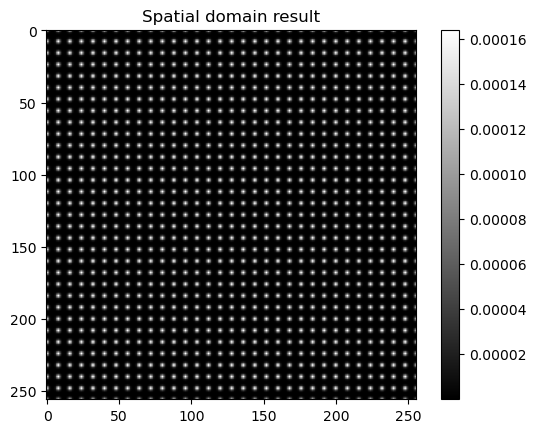

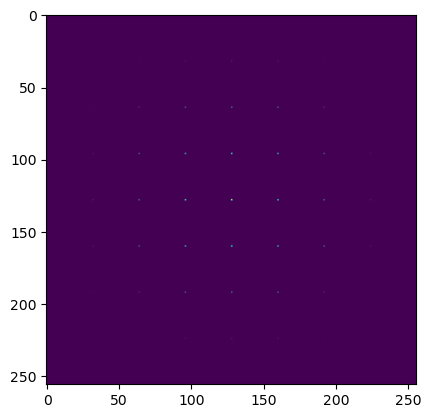

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Size of the image
N = 256
freq = np.zeros((N, N), dtype=complex)

# Set impulses periodically (e.g., every 32 pixels)
spacing = 32
for i in range(0, N, spacing):
    for j in range(0, N, spacing):
        # You can optionally apply a Gaussian envelope or phase shift
        freq[i, j] = 1.0 * np.exp(-((i - N//2)**2 + (j - N//2)**2) / (2 * (N//6)**2))

# Inverse FFT
spatial = np.fft.ifft2(np.fft.ifftshift(freq))

# Show magnitude
plt.imshow(np.abs(spatial), cmap='gray')
plt.colorbar()
plt.title("Spatial domain result")
plt.show()


plt.imshow(np.abs(freq))

In [17]:
plt.imshow(np.where(np.log10(np.abs(interp((U1, V1)))) > -5, np.log10(np.abs(interp((U1, V1)))), 0.))

NameError: name 'U1' is not defined

In [18]:

U_mod = U1 - np.median(U1.ravel())
# wave_z_freq_interp = gaussian_filter(interp_abs((U_mod, V1)) + 1j*interp_ang((U_mod, V1)), 0.001)
wave_z_freq_interp = gaussian_filter(interp((U_mod, V1)), 0.001)


plt.imshow(np.abs(wave_z_freq_interp))
plt.show()
plt.imshow(np.angle(wave_z_freq_interp))
plt.colorbar()
plt.show()


new_f = np.fft.ifft2(np.fft.fftshift(np.pad(wave_z_freq_interp*J, 0)))

plt.imshow((np.abs(new_f)), cmap='gray')
plt.show()
# [:256, :256]
plt.imshow(np.angle(new_f), cmap='gray')
plt.colorbar()
plt.show()

NameError: name 'U1' is not defined

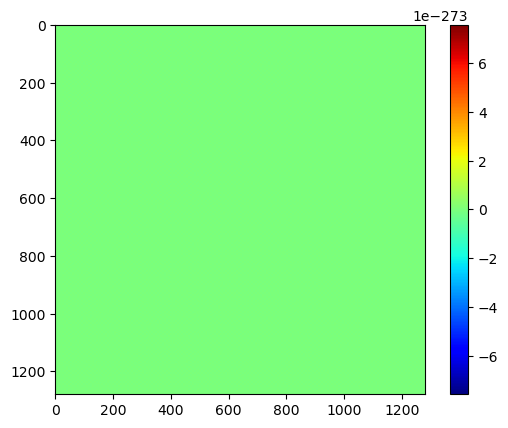

In [19]:
plt.imshow(np.imag(wave_z_freq), cmap='jet')
plt.colorbar()

In [105]:
# F_abs = grid_sample(torch.tensor(np.abs(wave_z_freq)).unsqueeze(0).unsqueeze(0).double(), torch.stack([torch.tensor(U_hat - np.median(U_hat[:, 0])), torch.tensor(V)], dim=2).unsqueeze(0))
# F_angle = grid_sample(torch.tensor(np.angle(wave_z_freq)).unsqueeze(0).unsqueeze(0).double(), torch.stack([torch.tensor(U_hat - np.median(U_hat[:, 0])), torch.tensor(V)], dim=2).unsqueeze(0))